### Import modules

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from collections import Counter
from general_functions import General

In [2]:
gen = General()

### Read data

In [3]:
cor_sents = gen.read_from_pickle('./Pickles/cor_sents.pickle')
cor_counts = gen.read_from_pickle('./Pickles/cor_counts.pickle')

### Network creation

In [4]:
def create_n_grams(sentences: list, n) -> list:
    """Convert sentences into n-grams
    Parameters:
        sentences (list): a list of tokens in each sentence
        n (int): n-gram order
    Returns:
        list: a list of all n-grams"""
    
    n_grams_list = []
    
    for sentence in sentences:
        n_grams = list(zip(*[sentence[i :] for i in range(n)]))
        n_grams_list.extend(n_grams)
        
    return n_grams_list

In [5]:
def create_bigram_network(sentences: list) -> nx.DiGraph:
    """Create a directed network of bigrams in a document/corpus
    Parameters:
        sentences (list): a list of tokens in each sentences
    Returns:
        nx.DiGraph: a directed vocabulary network"""
    
    df = pd.DataFrame(create_n_grams(sentences, 2), columns = ['w1', 'w2'])  # get bigrams as a tuple (w1, w2) and create dataframe
    
    df['bigram'] = df['w1'] + ' ' + df['w2']
    
    df = pd.DataFrame(df.groupby(['bigram']).size()).reset_index().rename(columns = {0: 'count'})  # count each bigram
    
    # split bigram into its constituent words
    df['w1'] = df['bigram'].apply(lambda x: x.split()[0].strip())
    df['w2'] = df['bigram'].apply(lambda x: x.split()[1].strip())
    
    # create graph
    return nx.from_pandas_edgelist(df, source = 'w1', target = 'w2', edge_attr = 'count', create_using = nx.DiGraph)

Create a bigram network of the corpus:

In [6]:
vocab_G = create_bigram_network(cor_sents)

Create a mini test network using the first 10 sentences:

In [7]:
mini_G = create_bigram_network(cor_sents[: 10])

### Basic network stats

Network info:

In [8]:
def network_info(G) -> None:
    """Basic statistics of a directed network
    Parameters:
        G (nx.DiGraph): a directed graph
    Returns:
        None"""
    
    print(nx.info(G))
    print('Density:', nx.density(G))
    
    in_deg = np.array(list(dict(G.in_degree()).values()))
    out_deg = np.array(list(dict(G.out_degree()).values()))
    
    print('Mean in-degree:', np.mean(in_deg))
    print('Median in-degree:', np.median(in_deg))
    print('Max in-degree:', max(in_deg))
    print('Min in-degree:', min(in_deg))
    print('Mean out-degree:', np.mean(out_deg))
    print('Median out-degree:', np.median(out_deg))
    print('Max out-degree:', max(out_deg))
    print('Min out-degree:', min(out_deg))

In [9]:
network_info(vocab_G)

DiGraph with 11553 nodes and 79604 edges
Density: 0.0005964622156876426
Mean in-degree: 6.8903315156236475
Median in-degree: 2.0
Max in-degree: 3222
Min in-degree: 0
Mean out-degree: 6.8903315156236475
Median out-degree: 2.0
Max out-degree: 3039
Min out-degree: 0


Network vis (use Gephi for larger networks):

In [10]:
def draw_graph(G) -> None:
    """Draw a network (recommended only for small graphs i.e. < 150 nodes)
    Parameters:
        G (nx.Graph): a graph (can also be a DiGraph, MultiGraph, or MultiDiGraph)
    Returns:
        None"""
    
    if len(G) < 150:
        fig = plt.figure(figsize = (15, 15))
        nx.draw_kamada_kawai(G, node_color = '#add8e6', with_labels = True)
        plt.show()
        plt.close()

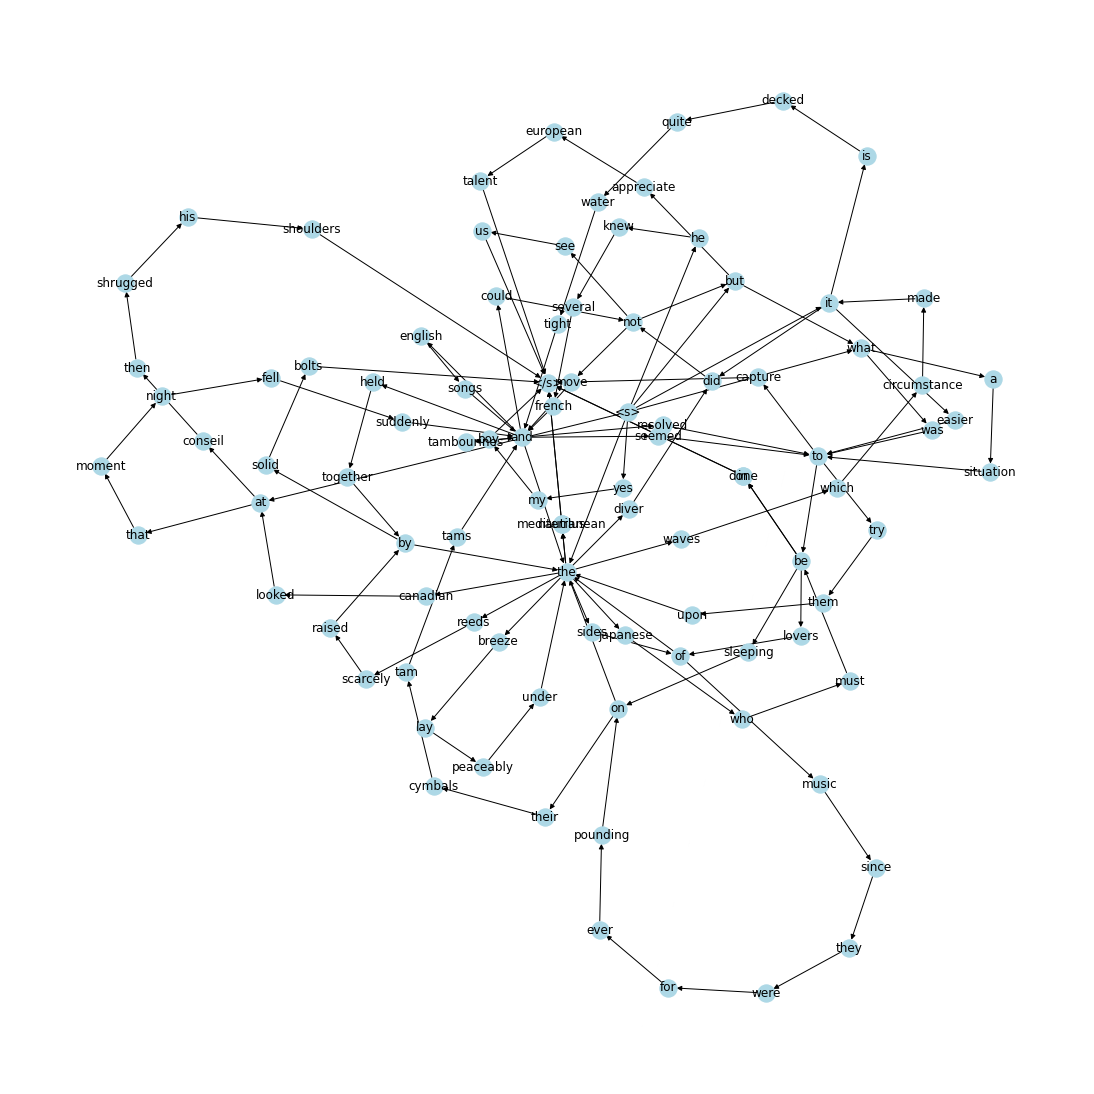

In [11]:
draw_graph(mini_G)

Set frequency as a node attribute:

In [12]:
nx.set_node_attributes(vocab_G, cor_counts, name = 'freq')

Save:

In [13]:
nx.write_gml(vocab_G, './Graphs/corpus_vocab.gml')

In [14]:
nx.write_gml(mini_G, './Graphs/mini_graph.gml')